# Data Science with Python: Movielens Case Study

In [1]:
#importing the librares
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

## Importing the three datasets

In [2]:
rating = ['UserID','MovieID','Rating','Timestamp']
user = ['UserID','Gender','Age','Occupation','Zip-code']
movie = ['MovieID','Title','Genres']

In [3]:
rating_df = pd.read_csv('/Users/prajyottadas/Downloads/movielens/ratings.dat',header=None,delimiter='::',names=rating)
print(rating_df.head())
print(rating_df.shape)

<ipython-input-3-78234b333e55>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating_df = pd.read_csv('/Users/prajyottadas/Downloads/movielens/ratings.dat',header=None,delimiter='::',names=rating)


   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
(1000209, 4)


In [4]:
user_df = pd.read_csv('/Users/prajyottadas/Downloads/movielens/users.dat',header=None,delimiter='::',names=user)
print(user_df.head())
print(user_df.shape)

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455
(6040, 5)


<ipython-input-4-ea1ca0098d2a>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  user_df = pd.read_csv('/Users/prajyottadas/Downloads/movielens/users.dat',header=None,delimiter='::',names=user)


In [5]:
movie_df = pd.read_csv('/Users/prajyottadas/Downloads/movielens/movies.dat',header=None,delimiter='::',names=movie)
print(movie_df.head())
print(movie_df.shape)

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
(3883, 3)


<ipython-input-5-f34ad52305ac>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie_df = pd.read_csv('/Users/prajyottadas/Downloads/movielens/movies.dat',header=None,delimiter='::',names=movie)


## Merging the datasets

In [6]:
Master_Data = rating_df.merge(user_df,how='outer',on='UserID')
Master_Data = Master_Data.merge(movie_df,how='outer',on='MovieID')
Master_Data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [7]:
Master_Data.shape

(1000386, 10)

In [8]:
Master_Data.dropna(inplace=True)

In [9]:
Master_Data.isna().value_counts()

UserID  MovieID  Rating  Timestamp  Gender  Age    Occupation  Zip-code  Title  Genres
False   False    False   False      False   False  False       False     False  False     1000209
dtype: int64

In [10]:
def unique_df(X):
    for i in X.columns:
        print('Column : ',i,'\n',X[i].unique(), '\n Total unique values is: ', X[i].nunique())
        print('----------------------------------------------------------------------')
unique_df(Master_Data)

Column :  UserID 
 [1.000e+00 2.000e+00 1.200e+01 ... 2.982e+03 3.893e+03 4.211e+03] 
 Total unique values is:  6040
----------------------------------------------------------------------
Column :  MovieID 
 [1193  661  914 ... 2845 3607 2909] 
 Total unique values is:  3706
----------------------------------------------------------------------
Column :  Rating 
 [5. 4. 3. 2. 1.] 
 Total unique values is:  5
----------------------------------------------------------------------
Column :  Timestamp 
 [9.78300760e+08 9.78298413e+08 9.78220179e+08 ... 9.58846401e+08
 9.76029116e+08 9.57273353e+08] 
 Total unique values is:  458455
----------------------------------------------------------------------
Column :  Gender 
 ['F' 'M'] 
 Total unique values is:  2
----------------------------------------------------------------------
Column :  Age 
 [ 1. 56. 25. 50. 18. 45. 35.] 
 Total unique values is:  7
----------------------------------------------------------------------
Column :  Occupati

## User Age Ditribution

<function matplotlib.pyplot.show(close=None, block=None)>

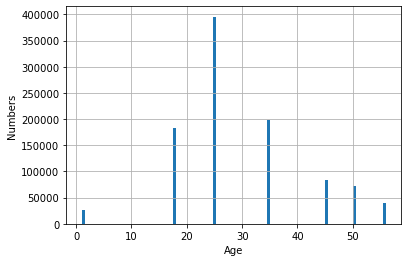

In [11]:
Master_Data['Age'].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Numbers')
plt.show

## User rating of the movie "Toy Story"

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
41626,1.0,1,5.0,978824268.0,F,1.0,10.0,48067,Toy Story (1995),Animation|Children's|Comedy
41627,6.0,1,4.0,978237008.0,F,50.0,9.0,55117,Toy Story (1995),Animation|Children's|Comedy
41628,8.0,1,4.0,978233496.0,M,25.0,12.0,11413,Toy Story (1995),Animation|Children's|Comedy
41629,9.0,1,5.0,978225952.0,M,25.0,17.0,61614,Toy Story (1995),Animation|Children's|Comedy
41630,10.0,1,5.0,978226474.0,F,35.0,1.0,95370,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
43698,6022.0,1,5.0,956755763.0,M,25.0,17.0,57006,Toy Story (1995),Animation|Children's|Comedy
43699,6025.0,1,5.0,956812867.0,F,25.0,1.0,32607,Toy Story (1995),Animation|Children's|Comedy
43700,6032.0,1,4.0,956718127.0,M,45.0,7.0,55108,Toy Story (1995),Animation|Children's|Comedy
43701,6035.0,1,4.0,956712849.0,F,25.0,1.0,78734,Toy Story (1995),Animation|Children's|Comedy


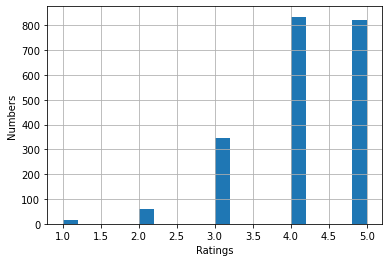

In [12]:
toy_story = Master_Data[Master_Data.Title == 'Toy Story (1995)']
toy_story.Rating.hist(bins=20)
plt.xlabel('Ratings')
plt.ylabel('Numbers')
plt.show
toy_story

## Top 25 moviesby viewership ratings

<function matplotlib.pyplot.show(close=None, block=None)>

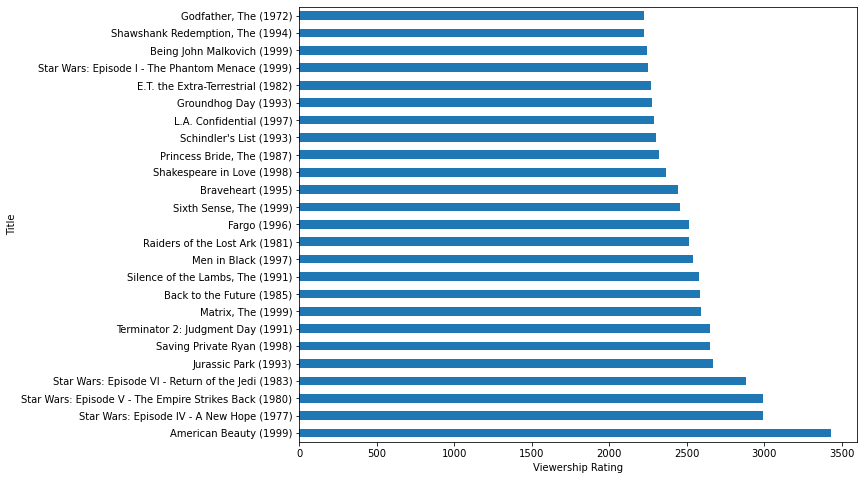

In [13]:
top25 = Master_Data.groupby('Title').size().sort_values(ascending=False)[:25]
top25.plot(kind='barh',figsize=(10,8))
plt.xlabel('Viewership Rating')
plt.ylabel('Title')
plt.show

## Find the ratings for all the movies reviewed by for a particular user of user id = 2696

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
24345,2696.0,1270,2.0,973308676.0,M,25.0,7.0,24210,Back to the Future (1985),Comedy|Sci-Fi
29848,2696.0,1097,3.0,973308690.0,M,25.0,7.0,24210,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
244232,2696.0,1617,4.0,973308842.0,M,25.0,7.0,24210,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
250014,2696.0,800,5.0,973308842.0,M,25.0,7.0,24210,Lone Star (1996),Drama|Mystery
273633,2696.0,3386,1.0,973308842.0,M,25.0,7.0,24210,JFK (1991),Drama|Mystery
277808,2696.0,3176,4.0,973308865.0,M,25.0,7.0,24210,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller
371178,2696.0,1711,4.0,973308904.0,M,25.0,7.0,24210,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery
377250,2696.0,1589,3.0,973308865.0,M,25.0,7.0,24210,Cop Land (1997),Crime|Drama|Mystery
598042,2696.0,1783,4.0,973308865.0,M,25.0,7.0,24210,Palmetto (1998),Film-Noir|Mystery|Thriller
603189,2696.0,1892,4.0,973308904.0,M,25.0,7.0,24210,"Perfect Murder, A (1998)",Mystery|Thriller


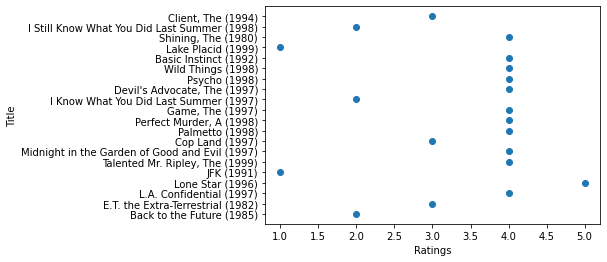

In [14]:
userid2696 = Master_Data[Master_Data.UserID == 2696]
plt.scatter(x=userid2696.Rating, y=userid2696.Title)
plt.xlabel('Ratings')
plt.ylabel('Title')
plt.show
userid2696

## Find out all the unique genres

In [15]:
Master_Data.Genres.unique()

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Adventure|Children's|Drama|Musical", 'Musical', 'Comedy',
       "Animation|Children's", 'Comedy|Fantasy', 'Animation',
       'Comedy|Sci-Fi', 'Drama|War', 'Romance',
       "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-Fi", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', 'Action|Adventure|Fantasy|Sci-Fi',
       "Children's|Comedy|Musical", 'Action|Drama|War',
       "Children's|Drama", 'Crime|Drama|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Mystery', 'Crime|Drama',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Romance|Sci-Fi|War', 'Action|Thriller',
       'Action|Drama', 'Co

In [16]:
Genre_list = Master_Data.Genres.tolist()
genre_list = []
i = 0
while(i < len(Genre_list)):
    genre_list += Genre_list[i].split('|')
    i += 1

In [17]:
unique_genre = list(set(genre_list))
print('Lenght of unique genre = ', len(unique_genre))
print(unique_genre)

Lenght of unique genre =  18
['Film-Noir', 'Sci-Fi', 'Mystery', 'Romance', 'Comedy', 'Fantasy', 'Musical', 'Action', 'Adventure', 'Crime', 'War', 'Western', 'Horror', 'Drama', 'Thriller', 'Animation', 'Documentary', "Children's"]


## Create a sepaerate column for each genre category with one hot encoding (1 and 0)

In [18]:
new_data = pd.concat([Master_Data, Master_Data.Genres.str.get_dummies()], axis=1)
print(new_data.columns)
new_data.head(10)

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
5,18.0,1193,4.0,978156168.0,F,18.0,3.0,95825,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
6,19.0,1193,5.0,982730936.0,M,1.0,10.0,48073,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
7,24.0,1193,5.0,978136709.0,F,25.0,7.0,10023,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
8,28.0,1193,3.0,978125194.0,F,25.0,1.0,14607,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
9,33.0,1193,5.0,978557765.0,M,45.0,3.0,55421,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0


## Features affecting ratings of a particular movie

In [19]:
new_data.Gender = pd.get_dummies(new_data.Gender)

In [20]:
X = new_data.drop(['UserID', 'MovieID', 'Title', 'Rating', 'Genres'], axis=1)
print('The features affecting the ratings of any particular movie are:')
print()
print(X.columns)

The features affecting the ratings of any particular movie are:

Index(['Timestamp', 'Gender', 'Age', 'Occupation', 'Zip-code', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


## Model to predict the movie ratings

In [21]:
y = new_data.Rating
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 21,stratify=y)

In [24]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print('The accuracy score of XGB model: ', accuracy_score(y_test, y_pred_xgb))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Zip-code

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn.predict(X_test)
print('The accuracy of the KNN model:', accuracy_score(y_test, y_pred_knn))

ValueError: could not convert string to float: '29404-2205'